In [484]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO # import from io to work in python 3
import requests
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from IPython.display import clear_output
import time
from arcgis.gis import GIS


ModuleNotFoundError: No module named 'geopandas'

In [360]:
#impostrt data and display the data
url = "https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv"
dataframe = pd.read_csv(StringIO(requests.get(url).text))
# iterating the columns
for col in dataframe.columns:
    print(col)
display("show me the shapeof the dataframe in columns & rows):" '' + str(dataframe.shape))
display('show header of first 5 of confirmed cases',dataframe.head(5))

countyFIPS
County Name
State
StateFIPS
2020-01-22
2020-01-23
2020-01-24
2020-01-25
2020-01-26
2020-01-27
2020-01-28
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-08
2020-02-09
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-15
2020-02-16
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020

'show me the shapeof the dataframe in columns & rows):(3193, 769)'

'show header of first 5 of confirmed cases'

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,15350,15366,15387,15409,15409,15409,15436,15442,15451,15468
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,54545,54614,54663,54700,54700,54700,54784,54805,54837,54874
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,5413,5413,5422,5424,5424,5424,5429,5430,5433,5436
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,6331,6336,6345,6349,6349,6349,6355,6360,6364,6367


# Subsetting (slicing data)

In [27]:
# subset by rows and columns
# calling head() method  
# storing in new variable 
data_top = data.head()
print(data_top)

   countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2022-02-13  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...       15216   
2           0           0           0           0  ...       54301   
3           0           0           0           0  ...        5402   
4           0           0           0           0  ...        6294   

   2022-02-14  2022-02-15  2022-02-16  2022-02-17  2022-02-18  2022-02-19  \
0           0  

NameError: name 'head' is not defined

In [361]:
FL_St = dataframe[dataframe["State"] == "FL"]
FL_St = FL_St.drop(FL_St.iloc[:, 4:349], axis = 1) # remove som columns
FL_St = FL_St.iloc[0:30,:] # resude the data set to about 30 rows


# FL_GA = FL_GA[FL_GA[FL_GA.columns[-1]] > 150].sort_values(by=[FL_GA.columns[-1]], ascending=False)
# state = str(dataframe[dataframe.columns[2]])
# florida = np.zeros(len(FL_GA))
# type(state)
# for i in range(len(state)):
#     if state[i] == 'FL'
#     florida[i] = state[i]
# #     print(florida)

display("show me no of rows and colummns" '' + str(FL_St.shape)) 
display('header',FL_St.head())
print(FL_St)



'show me no of rows and colummns(30, 424)'

'header'

,countyFIPS,County Name,State,StateFIPS,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,...,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24
329,0,Statewide Unallocated,FL,12,3010,3045,3065,3078,3082,3156,...,30645,37120,37120,3017,8308,11458,15156,15156,15156,15156
330,12001,Alachua County,FL,12,15866,16230,16335,16437,16585,16804,...,65992,65992,65992,66632,66632,66632,66632,66632,66632,66632
331,12003,Baker County,FL,12,2470,2527,2544,2552,2580,2598,...,8506,8506,8506,8588,8588,8588,8588,8588,8588,8588
332,12005,Bay County,FL,12,11907,12132,12261,12360,12471,12654,...,44913,44913,44913,45278,45278,45278,45278,45278,45278,45278
333,12007,Bradford County,FL,12,2180,2224,2235,2247,2258,2276,...,7355,7355,7355,7412,7412,7412,7412,7412,7412,7412


     countyFIPS            County Name State  StateFIPS  2021-01-01  \
329           0  Statewide Unallocated    FL         12        3010   
330       12001        Alachua County     FL         12       15866   
331       12003          Baker County     FL         12        2470   
332       12005            Bay County     FL         12       11907   
333       12007       Bradford County     FL         12        2180   
334       12009        Brevard County     FL         12       21034   
335       12011        Broward County     FL         12      137610   
336       12013        Calhoun County     FL         12        1233   
337       12015      Charlotte County     FL         12        7410   
338       12017         Citrus County     FL         12        6663   
339       12019           Clay County     FL         12       11261   
340       12021        Collier County     FL         12       22506   
341       12023       Columbia County     FL         12        6007   
342   

In [362]:
drop_data = FL_St.drop(columns = ["countyFIPS", "StateFIPS", "State"]) # delete uneeded columns 
group_by_county = drop_data.groupby(["County Name"]) # group the data according to county
sum_total = group_by_county.sum() #sum the data acoording to the county
sum_sort = sum_total.sort_values(by = [dataframe.columns[-1]], ascending = False) #sort by asecdigng order

#Plot

<AxesSubplot:title={'center':'Rising Case'}>

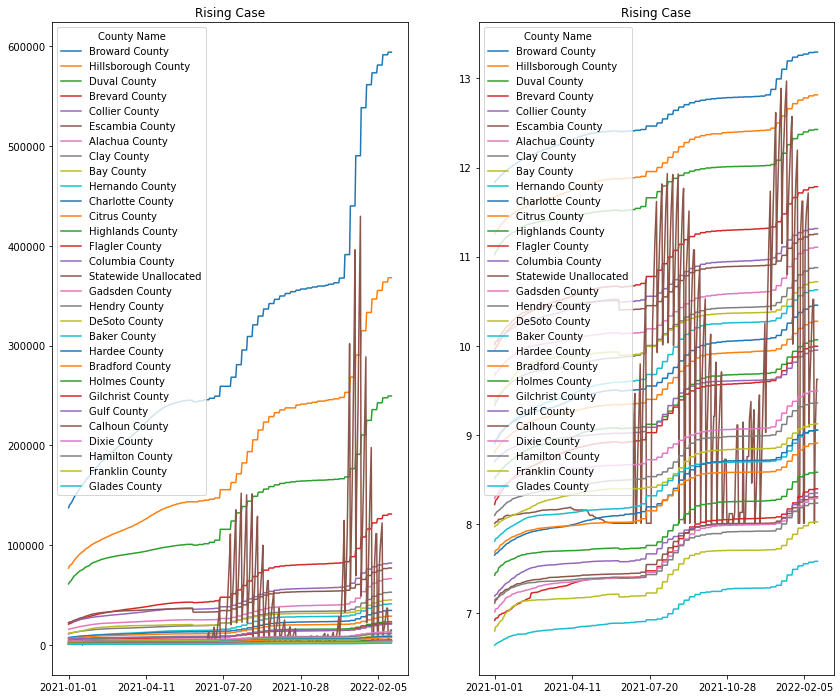

In [272]:
figure, axis = plt.subplots(1, 2)
#t change the row elements into column elements and the column elements into row elements the plot
sum_sort.transpose().plot(figsize = (14,12), title ='Rising Case', ax = axis[0]) 
sum_sort.transpose().apply(np.log).plot(figsize = (14,12), title ='Rising Case',ax = axis[1])



In [300]:
# infection rate by state 
# df = dataframe[dataframe[dataframe.columns[-1]] > 500]
drop_data = dataframe.drop(columns = ["countyFIPS", "StateFIPS", "County Name"]) # delete uneeded columns
group_state = drop_data.groupby(['State']) # groups all states that are similar in naming (e.g FL, NY etc)
sum_group = group_state.sum() # sum individual data for the grouped state
# select the South easter states using the loc method that access the rows and return them as series
select_SE_states = sum_group.loc[["AL", "AR", "FL", "GA", "KY", "LA", "MS", "NC", "SC", "VA", "WV"]]
select_SE_states = select_SE_states.drop(select_SE_states.iloc[:, 0:397], axis = 1) # dataset use was one year 2/22/2021 to 2/22/2022

# show some of the data set by slicing
display("show me no of rows and colummns" '' + str(select_SE_states.shape)) 
display('header',select_SE_states.head())

# sort series in asceding order
sort_series = select_SE_states.sort_values(by=[select_SE_states.columns[-1]], ascending=False).head(15)
         

'show me no of rows and colummns(11, 366)'

'header'

,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,...,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22
State,,,,,,,,,,,,,,,,,,,,,
AL,487439,488842,490138,491116,491868,492696,493257,493770,494442,497161,...,1259580,1263796,1265932,1267907,1270015,1271455,1271455,1271455,1273484,1274123
AR,315782,316612,317410,318135,318646,319203,322511,322594,323010,323399,...,782115,785516,787066,788093,789185,790445,790445,790445,792621,792621
FL,1872924,1878534,1885661,1892301,1898223,1903682,1909222,1910924,1918101,1924115,...,5751104,5757006,5763441,5769916,5769916,5778186,5783477,5786627,5790325,5790325
GA,806135,808426,810479,812615,814824,816986,818522,819739,821489,823025,...,1889880,1894653,1896497,1898410,1899884,1902211,1902211,1902211,1904915,1905790
KY,397535,399023,400314,401571,402735,403783,404448,404959,406032,407366,...,1232297,1240115,1244139,1249266,1254101,1258447,1258447,1258447,1264329,1267592


<AxesSubplot:title={'center':'One year Covid Rise (normalised)'}>

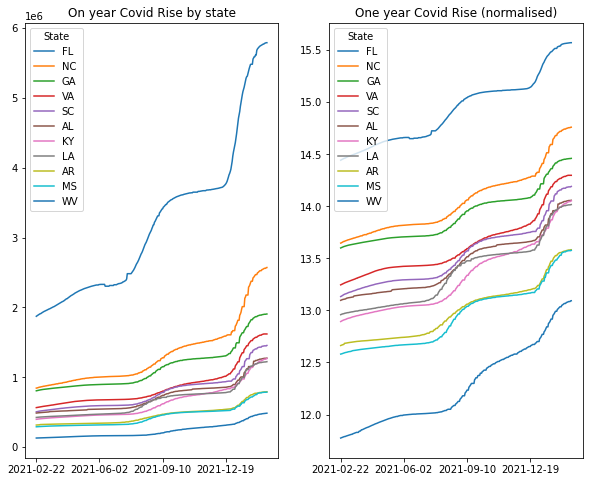

In [302]:
figure, axis = plt.subplots(1, 2)

sort_series.transpose().plot(ax = axis[0], figsize = (10, 8), title = "On year Covid Rise by state")
sort_series.transpose().apply(np.log).plot(ax = axis[1], figsize = (10, 8), title = "One year Covid Rise (normalised)") # log normaalised for comparison


# this is a comparison with economic data

Data, S&P curled from marketwatch.com 
https://www.marketwatch.com/investing/index/spx/download-data?startDate=2/22/2021&endDate=2/22/2022
The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. (the fortune  500)

In [348]:
SEcovidCase =  sort_series # get data from the last soredt data by South easter states
SEcovidCase = SEcovidCase.transpose().tail(50)  # only data from the last 50 days are of interest
SEcovidCase.index = pd.to_datetime(SEcovidCase.index) # indec the data by date and time using pandas

display("show me no of rows and colummns" '' + str(SEcovidCase.shape)) 
display('header',SEcovidCase.head())
# download the S&P dataset 
url ="https://www.marketwatch.com/investing/index/spx/downloaddatapartial?startdate=02/22/2021%2000:00:00&enddate=02/22/2022%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false"
spdata = pd.read_csv(url)
spdata = spdata.set_index("Date")

# merge and create tables with Covid cases and data from fortune 500 companies
SEcovidCase_spdata = pd.merge(right = spdata, left = SEcovidCase,  right_index=True, left_index = True, how='left') # merge and index the both data frames

# since stock data a usually unvalaibel on weekend, letas make the weekedn an empty rows

SEcovidCase_spdata = SEcovidCase_spdata.fillna(method = "backfill")

# # view
display("SEcovidCase_spdata rows and colummns:" "" + str(SEcovidCase_spdata.shape)) 
display('SEcovidCase_spdata:',SEcovidCase_spdata.head())

# print(SEcovidCase_spdata.columns[0:11]) #check column position
SEcovidCase_spdata["USA"] = SEcovidCase_spdata[SEcovidCase_spdata.columns[0:11]].sum(axis=1)
print(SEcovidCase_spdata)

#show tail
display("USA sum rows and colummns:" "" + str(SEcovidCase_spdata.shape)) 
SEcovidCase_spdata.tail()

'show me no of rows and colummns(50, 11)'

'header'

State,FL,NC,GA,VA,SC,AL,KY,LA,AR,MS,WV
2022-01-04,4418907,1742844,1475883,1176159,1011271,921175,885673,869146,576326,566102,339679
2022-01-05,4486276,1763614,1493254,1186887,1018435,932250,895370,879549,583504,572694,342607
2022-01-06,4562467,1787906,1493254,1202727,1035256,944876,904916,893626,590931,579773,347276
2022-01-07,4632369,1816380,1493254,1221036,1048252,957848,915881,908428,598746,586547,351688
2022-01-08,4709525,1816380,1493254,1221036,1048252,957848,915881,908428,598746,586547,351688


'SEcovidCase_spdata rows and colummns:(50, 15)'

'SEcovidCase_spdata:'

,FL,NC,GA,VA,SC,AL,KY,LA,AR,MS,WV,Open,High,Low,Close
2022-01-04 00:00:00,4418907,1742844,1475883,1176159,1011271,921175,885673,869146,576326,566102,339679,NaN,NaN,NaN,NaN
2022-01-05 00:00:00,4486276,1763614,1493254,1186887,1018435,932250,895370,879549,583504,572694,342607,NaN,NaN,NaN,NaN
2022-01-06 00:00:00,4562467,1787906,1493254,1202727,1035256,944876,904916,893626,590931,579773,347276,NaN,NaN,NaN,NaN
2022-01-07 00:00:00,4632369,1816380,1493254,1221036,1048252,957848,915881,908428,598746,586547,351688,NaN,NaN,NaN,NaN
2022-01-08 00:00:00,4709525,1816380,1493254,1221036,1048252,957848,915881,908428,598746,586547,351688,NaN,NaN,NaN,NaN


                          FL       NC       GA       VA       SC       AL  \
2022-01-04 00:00:00  4418907  1742844  1475883  1176159  1011271   921175   
2022-01-05 00:00:00  4486276  1763614  1493254  1186887  1018435   932250   
2022-01-06 00:00:00  4562467  1787906  1493254  1202727  1035256   944876   
2022-01-07 00:00:00  4632369  1816380  1493254  1221036  1048252   957848   
2022-01-08 00:00:00  4709525  1816380  1493254  1221036  1048252   957848   
2022-01-09 00:00:00  4758500  1816380  1493254  1221036  1048252   957848   
2022-01-10 00:00:00  4806199  1887560  1572899  1278739  1094226   984882   
2022-01-11 00:00:00  4877945  1905265  1590529  1295420  1102603   993418   
2022-01-12 00:00:00  4933518  1930710  1603820  1315256  1114781  1004622   
2022-01-13 00:00:00  4992579  1975543  1622845  1334198  1132825  1004622   
2022-01-14 00:00:00  5041424  2011302  1637633  1351417  1153125  1004622   
2022-01-15 00:00:00  5088652  2011302  1637633  1351417  1153125  1004622   

'USA sum rows and colummns:(50, 16)'

,FL,NC,GA,VA,SC,AL,KY,LA,AR,MS,WV,Open,High,Low,Close,USA
2022-02-18 00:00:00,5778186,2559793,1902211,1619839,1449637,1271455,1258447,1219464,790445,785528,481818,NaN,NaN,NaN,NaN,19116823
2022-02-19 00:00:00,5783477,2559793,1902211,1619839,1449637,1271455,1258447,1219464,790445,785528,481818,NaN,NaN,NaN,NaN,19122114
2022-02-20 00:00:00,5786627,2559793,1902211,1619839,1449637,1271455,1258447,1219464,790445,785528,481818,NaN,NaN,NaN,NaN,19125264
2022-02-21 00:00:00,5790325,2569681,1904915,1619839,1449637,1273484,1264329,1221493,792621,785528,484923,NaN,NaN,NaN,NaN,19156775
2022-02-22 00:00:00,5790325,2571397,1905790,1619839,1455967,1274123,1267592,1223067,792621,787396,485498,NaN,NaN,NaN,NaN,19173615


In [494]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
US_Covid_df = pd.read_csv(url, header=0, escapechar='\\')
US_Covid_df.head(6)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15366,15387,15409,15420,15431,15436,15442,15451,15468,15479
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,54614,54663,54700,54734,54763,54784,54805,54837,54874,54904
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5413,5422,5424,5426,5429,5429,5430,5433,5436,5438
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6336,6345,6349,6351,6354,6355,6360,6364,6367,6369
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14594,14632,14643,14663,14672,14682,14688,14706,14710,14734
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,2270,2271,2271,2272,2273,2273,2276,2278,2280,2280


In [369]:
#display columns
US_Covid_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2/15/22', '2/16/22', '2/17/22', '2/18/22', '2/19/22', '2/20/22',
       '2/21/22', '2/22/22', '2/23/22', '2/24/22'],
      dtype='object', length=776)

# look up data and fix any none matching columns and rows


In [495]:
#US_Covid_df.tail()
US_Covid_df[US_Covid_df["Admin2"].notna()].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15366,15387,15409,15420,15431,15436,15442,15451,15468,15479
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,54614,54663,54700,54734,54763,54784,54805,54837,54874,54904
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5413,5422,5424,5426,5429,5429,5430,5433,5436,5438
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6336,6345,6349,6351,6354,6355,6360,6364,6367,6369
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14594,14632,14643,14663,14672,14682,14688,14706,14710,14734


In [510]:
# infection rate by state 

group_states = US_Covid_df.groupby(['Province_State'])
sum_groups = group_states.sum() # sum individual data for the grouped state

# #select the South eastern states using the loc method that access the rows and return them as series
SE_states = sum_groups.loc[["Alabama", "Arizona", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland",
                               "Mississippi","North Carolina", "South Carolina", "Virginia", "West Virginia"]]

SE_states =  SE_states.sort_values(by=[SE_states.columns[-1]], ascending = False).head(10)

#show data descending
display("show me no of rows and colummns" '' + str(SE_states.shape)) 
display('header',SE_states.head())

# sort data ascending
SE_states2 =  SE_states.sort_values(by=[SE_states.columns[-1]], ascending = True).head(10)

# # show some of the data set by slicing
display("show me no of rows and colummns" '' + str(SE_states2.shape)) 
display('header',SE_states2.head())

# compare Feb 15 2020 vs 2021 vs 2022

SE_states[["2/15/20", "1/15/21", "2/15/22"]]


'show me no of rows and colummns(10, 771)'

'header'

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Florida,5796978574,57960,978574.0,1939.030577,-5540.949842,0,0,0,0,0,...,5776333,5776333,5818706,5818706,5818706,5818706,5818706,5818706,5818706,5818706
North Carolina,8571880074,85680,3880074.0,3562.420971,-7950.109874,0,0,0,0,0,...,2549339,2554922,2559793,2559793,2559793,2569681,2571397,2574867,2578517,2583404
Georgia,13526262703,135240,2262703.0,5216.556611,-13288.811358,0,0,0,0,0,...,2446525,2448939,2451908,2451908,2451908,2455573,2456866,2458946,2461103,2462663
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,1957085,1959866,1962920,1962920,1967702,1967704,1970442,1971678,1973479,1975252
Virginia,11346988213,113400,6988213.0,4996.297993,-10442.323661,0,0,0,0,0,...,1616749,1619839,1622685,1622685,1622685,1628593,1630682,1632675,1634851,1636510


'show me no of rows and colummns(10, 771)'

'header'

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Maryland,2184747127,21840,747127.0,936.358097,-1840.211223,0,0,0,0,0,...,994577,995328,996182,997047,998136,998136,998888,999229,999890,1000562
Louisiana,5545582140,55440,1582140.0,1989.915353,-5876.747946,0,0,0,0,0,...,1154448,1156065,1157117,1157117,1157117,1158918,1160293,1161126,1161957,1162537
Kentucky,10250704442,102480,2704442.0,4514.657262,-10223.986874,0,0,0,0,0,...,1249266,1254101,1258447,1258447,1258447,1264329,1267592,1270258,1270258,1274681
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,1267907,1270015,1271455,1272608,1273092,1273484,1274123,1275355,1276580,1277837
South Carolina,4034242206,40320,2242206.0,1562.043718,-3725.236386,0,0,0,0,0,...,1445381,1447557,1449637,1449637,1449637,1449637,1455967,1456990,1458075,1459070


,2/15/20,1/15/21,2/15/22
Province_State,,,
Florida,0,1548067,5776333
North Carolina,0,659840,2543260
Georgia,0,801130,2443410
Arizona,1,658186,1953168
Virginia,0,422634,1613719
South Carolina,0,375967,1443723
Alabama,0,417528,1265932
Kentucky,0,321269,1244139
Louisiana,0,364853,1153232


In [564]:
# How to GroupBy a Dataframe in Pandas and keep Columns
group_retain = US_Covid_df.groupby(['Province_State']).count().reset_index() 
#drop some data
group_retain_df = group_retain.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Country_Region", 
                                             "Lat", "Long_", "Combined_Key"])
#sum all the covida cases
group_retain_df["Sum_total"] =  group_retain_df[group_retain_df.columns[1:]].sum(axis=1) 
group_retain_df

# Set index on a Dataframe
group_retain_df.set_index("Province_State", inplace = True)
#select intereted stastes
SE_states3  = group_retain_df.loc[["Alabama", "Arizona", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland",
                               "Mississippi","North Carolina", "South Carolina", "Virginia", "West Virginia"]]

#plooooooooooooooooooooooooooooooooooooooooooooots
# Province_State = SE_states3.iloc[0]
# Sum_total = SE_states3.iloc[-1]

# state_conc = pd.concat([Province_State,Sum_total], axis = 1)

# Sum_total

# Keep exploring

In [517]:
#make the list of the dates (date list)

date_series = group_retain.columns.tolist()[11:]
date_series[0], date_series[-1]

# what is the the state with the highst infection?
SE_states[date_series[-1]].idxmax(), SE_states[date_series[-1]].max()

#check other states
group_retain[group_retain['Province_State'] == "Georgia"].sum()[date_series]

1/22/20    161
1/23/20    161
1/24/20    161
1/25/20    161
1/26/20    161
          ... 
2/21/22    161
2/22/22    161
2/23/22    161
2/24/22    161
2/25/22    161
Length: 766, dtype: object